# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

In [166]:
import numpy as np
import pandas as pd
from plotnine import *
import sklearn as sk
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [167]:
train_data = pd.read_csv('asteroidTrain.csv') 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       100000 non-null  object 
 1   a               100000 non-null  float64
 2   e               100000 non-null  float64
 3   G               80 non-null      float64
 4   i               100000 non-null  float64
 5   om              100000 non-null  float64
 6   w               100000 non-null  float64
 7   q               100000 non-null  float64
 8   ad              100000 non-null  float64
 9   per_y           100000 non-null  float64
 10  data_arc        99907 non-null   float64
 11  condition_code  100000 non-null  float64
 12  n_obs_used      100000 non-null  int64  
 13  H               99459 non-null   float64
 14  diameter        100000 non-null  object 
 15  extent          10 non-null      object 
 16  albedo          99122 non-null   float64
 17  rot_per    

C:\Users\maxho\AppData\Local\Temp\ipykernel_9984\2000030614.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.


In [168]:
#importamos los set de datos de evaluacion y de entrenamiento
train_data = pd.read_csv('asteroidTrain.csv') 
train_data['diameter']=train_data['diameter'].astype(float)
train_data.drop(['full_name','spec_B','spec_T','extent','GM','BV','UB','IR','rot_per','G','albedo','H','data_arc'], axis=1, inplace=True)
#cambiamos los N e Y de pha y neo a 0 y 1
train_data['pha'] = train_data['pha'].replace(['N', 'Y'], [0, 1])
train_data['neo'] = train_data['neo'].replace(['N', 'Y'], [0, 1])
#borramos los nan 
train_data.dropna(inplace=True)

#printeamos los primeros datos
print(train_data)

              a         e          i          om           w         q  \
0      3.069866  0.184417   3.620920  308.458533  249.570070  2.503729   
1      2.386539  0.104566  13.003513  105.866881  329.104052  2.136988   
2      3.018175  0.084529  14.247933  245.449168  115.242451  2.763053   
3      2.793049  0.290215  16.677722   17.862425  287.769691  1.982465   
4      2.721394  0.098602   1.975506  271.706257  248.448520  2.453059   
...         ...       ...        ...         ...         ...       ...   
99995  3.161511  0.166092  28.442710  224.796987    2.422644  2.636410   
99996  2.715932  0.239266  16.789523   34.531718   44.097353  2.066102   
99997  3.188786  0.278970  15.177104  188.342499  255.934423  2.299209   
99998  2.754535  0.106028   8.758664  230.483443   34.567890  2.462477   
99999  3.940892  0.241022   9.495628  192.657992  197.808221  2.991051   

             ad     per_y  condition_code  n_obs_used  diameter  neo  pha  \
0      3.636003  5.378824         

C:\Users\maxho\AppData\Local\Temp\ipykernel_9984\3744852040.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.


Para poder trabajar de buena manera con la información entregada es necesario eliminar la columna full_name ya que es solo un identificador de los asteroides que nos estorba al no ser un float.
 
Con el fin de limpiar los datos, eliminamos las columnas que no tienen datos (NaN) para poder predecir sin que los datos (o falta de datos) afecten la predicci. . Con esto se eliminan las columnas G, data_arc, H, extent, albedo, rot_per, GM, BV, UB, IR, spec_B, spec_T.
 
Además, reemplazando los datos de las variables categóricas neo y pha, siendo la N ahora a e Y p. De esta manera podemos trabajar en nuestro modelo con esta información.
 
Cabe destacar que borramos los NaN y eliminamos ciertas columnas que nos parecieron innecesarias (adoc al pdf que adjuntamos) y al tener un computador con una buena capacidad de procesamiento de informacion no fue necesario hacer una muestra de los datos, mas bien ejecutarlo simplemente.


Para entrenar el modelo utilizamos MLPRegressor ya que lo que queremos hacer es una predicción de números continuos, por lo que una clasificación no serviría. 

De hiperparámetros utilizamos 10 neuronas o "capas ocultas" (hidden_layer_sizes) controlando así el número de pesos para nuestra red neuronal, elegimos este número a través de intento y error viendo una cantidad de neuronas adecuadas que disminuyese nuestro error final, buscando algún punto medio para que estas no fueran deficientes ni que hubiesen en exceso. 

Respecto al learning rate este lo asignamos de 0.0001 para que el modelo fuera aprendiendo a ese ritmo y sin demorarse excesivamente y entrenando fiablemente, mientras que en las épocas asignamos 500 para entrenar el modelo sin que fuera excesivo causando una sobreentrenamiento y tampoco tan básico. 

El batch size en automático para para que el mismo modelo viera qué tipo de n_sample utilizars lo que significa que es min(200, n_samples.),además de una tolerancia de 0.00000001 para que la ejecucion del modelo no termine inmediatamente y asi lograr disminuir el error ya que se ejecutaba en 120 epocas de un total de 500.


La razón por la que se escogieron estos números para los hiperparámetros es que en el learning rate init y en el tol pusimos numeros bastante bajos para que no parara de iterar cuando no bajaba mucho el error, esto lo probamos ejecutando codigo una y otra vez.

El solver adam lo escogimos  por ser el default que funciona bien con grandes datasets, se refiere a que se utiliza el método de gradiente stochastic gradient-based optimizer. Este solver tiene un tiempo de cálculo más rápido y necesita menos parámetros para ajustarse. Combina los mejores atributos de otros algoritmos como AdaGrad y RMSProp para ser capaz de resolver de mejor manera gradientes dispersas.
 
La activación relu (rectified linear unit) la utilizamos como función de activación porque es una de las más rápidas y tiene mejor rendimiento que otras funciones de activación, esta función obtiene diferentes ventajas por sobre las otras activaciones tales como la simplicidad (al no usar cálculo exponencial como sigmoide y tanh), el esparcimiento de representación (dado que las redes neuronales pueden habilitar capas ocultas e incluir uno o más valores de cero verdadero) y el comportamiento lineal (al parecerse a la función de activación lineal que permite optimizar fácilmente el comportamiento de las redes neuronales). De esta forma esta activación era la que más se adecuaba al contexto de nuestro problema y que nos permitiría entrenar nuestro modelo de forma eficiente disminuyendo el error frente a las otras activaciones.



In [171]:
#Creando y entrenando un modelo
from sklearn.neural_network import MLPRegressor
#creamos el traindata sin la columna de diametro
train_data_sin_diameter = train_data.drop(['diameter'], axis=1)
#creamos el modelo
modelo = MLPRegressor(hidden_layer_sizes=(10,),batch_size='auto',learning_rate_init=0.0001,max_iter=500,activation='relu',solver='adam',verbose=True,tol=0.00000001)
#hacemos un fit a los datos de entrenamiento
modelo.fit(train_data_sin_diameter, train_data['diameter'])

Iteration 1, loss = 9809.00781247
Iteration 2, loss = 1945.39798577
Iteration 3, loss = 587.40167754
Iteration 4, loss = 341.42461919
Iteration 5, loss = 207.55458544
Iteration 6, loss = 121.27180922
Iteration 7, loss = 76.26271684
Iteration 8, loss = 57.10571082
Iteration 9, loss = 47.18071448
Iteration 10, loss = 40.08253429
Iteration 11, loss = 35.90555328
Iteration 12, loss = 33.89967886
Iteration 13, loss = 33.16299968
Iteration 14, loss = 32.88388630
Iteration 15, loss = 32.67104789
Iteration 16, loss = 32.55401161
Iteration 17, loss = 32.45154508
Iteration 18, loss = 32.36445068
Iteration 19, loss = 32.27069485
Iteration 20, loss = 32.18736404
Iteration 21, loss = 32.13661172
Iteration 22, loss = 32.01491622
Iteration 23, loss = 31.95275266
Iteration 24, loss = 31.85524337
Iteration 25, loss = 31.81477919
Iteration 26, loss = 31.77132304
Iteration 27, loss = 31.70773090
Iteration 28, loss = 31.61065901
Iteration 29, loss = 31.56382675
Iteration 30, loss = 31.52585587
Iteration 3

C:\Users\maxho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


MLPRegressor(hidden_layer_sizes=(10,), learning_rate_init=0.0001, max_iter=500,
             tol=1e-08, verbose=True)

In [172]:

#Error final del modelo (entrenamiento)
print("Error de entrenamiento final:",modelo.loss_)
#Mejor error del modelo (entrenamiento)
print("Mejor error de entrenamiento:",modelo.best_loss_)

Error de entrenamiento final: 25.361752362794945
Mejor error de entrenamiento: 25.324982721120502


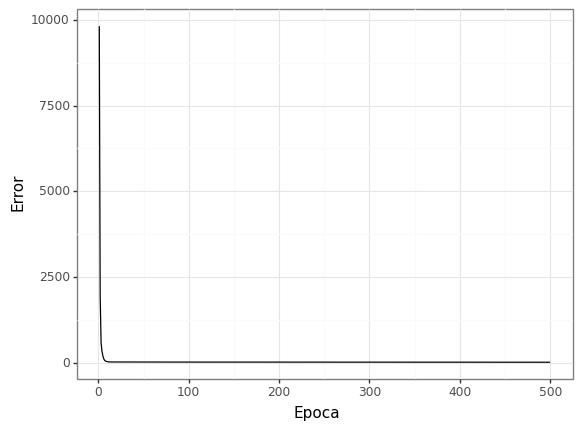

<ggplot: (150408804866)>

In [173]:
#Curva de aprendizaje
tempDF=pd.DataFrame(modelo.loss_curve_,columns=["Error"])
tempDF["Epoca"]=range(1,tempDF.shape[0]+1)
ggplot(tempDF)+aes(x="Epoca",y="Error")+theme_bw()+geom_line()

In [174]:
#importamos los set de datos de evaluacion y de entrenamiento
Eval_data = pd.read_csv('asteroidEval.csv') 

Eval_data.drop(['full_name','spec_B','spec_T','extent','GM','BV','UB','IR','rot_per','G'], axis=1, inplace=True)

Eval_data['pha'] = Eval_data['pha'].replace(['N', 'Y'], [0, 1])
Eval_data['neo'] = Eval_data['neo'].replace(['N', 'Y'], [0, 1])

Eval_data = Eval_data.dropna(axis=1)

#printeamos los primeros datos
print(Eval_data)

              a         e          i          om           w         q  \
0      3.969733  0.082587   6.263280  159.529531  338.904665  3.641886   
1      2.262880  0.096618  22.340191   52.502912   87.172523  2.044245   
2      3.072270  0.103533   9.503231  217.293949  191.020252  2.754189   
3      2.766916  0.208954  10.208236  161.123803  188.856431  2.188758   
4      2.361788  0.259924   9.486384  100.768260  231.685109  1.747903   
...         ...       ...        ...         ...         ...       ...   
37676  3.948805  0.121336  12.100826  176.921861  253.018391  3.469671   
37677  2.985065  0.085091   9.437864  165.845432   49.880238  2.731062   
37678  2.250727  0.146572   4.952574  136.066108  218.906512  1.920834   
37679  2.692312  0.182102  14.004905  177.379901   92.464686  2.202038   
37680  2.976344  0.086984  12.570232   90.159809  275.399609  2.717450   

             ad     per_y  condition_code  n_obs_used  neo  pha      moid  
0      4.297579  7.909520          

C:\Users\maxho\AppData\Local\Temp\ipykernel_9984\684258819.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.


In [175]:
#ocupamos el modelo para predecir el diametro de un asteroide
print(modelo.predict(train_data_sin_diameter))
X = modelo.predict(Eval_data)
#cree un csv de una sola columna con la variable X
X = pd.DataFrame(X)
X.to_csv('X.csv', index=False, header=False)



[ 6.82181396  5.00124481  4.56352549 ...  5.32805381  5.30727775
 20.24368193]


Listo